<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2014/others/Overlay_image_on_another.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from IPython.display import Image as IMAGE
# import cv2
import numpy as np
from PIL import Image
# import torch
import os
# import glob
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# resize images
p = '/content/gdrive/My Drive/eva_files/rcnn/bg-224x224'
for i in os.listdir('/content/gdrive/My Drive/eva_files/rcnn/bg'):
  file = '/content/gdrive/My Drive/eva_files/rcnn/bg/'+str(i)
  im = Image.open(file)
  im1 = im.resize((224,224))
  im1.save(os.path.join(p,'bg'+i))

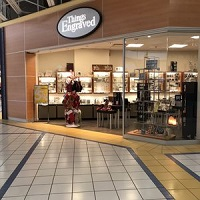

In [0]:
IMAGE(filename='/content/gdrive/My Drive/eva_files/rcnn/bg/1.jpg')

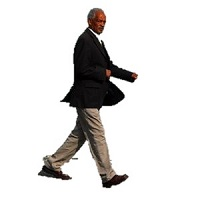

In [0]:
IMAGE(filename='/content/gdrive/My Drive/eva_files/rcnn/people-no bg/1.jpg')

Overlay an image- img1 with transparent background on another image img2:

Logic: Compared the rgb channel values of img2 with img1. Check if values in img1 are not near to the white color value.If so replace that value of img1 with the corresponding value of img2.

Limitation: Doesn't work properly if img2 has white patches

In [0]:
def overlay(background,foreground,x=0,y=0):
  bg1 = Image.open(background)   # reads an image in the BGR format
  bg = np.array(bg1)
  person1 = Image.open(foreground)   # reads an image in the BGR format
  person = np.array(person1)

  for i in range(person.shape[0]):
    for j in range(person.shape[1]):
      for k in range(3):
        try:
          if person1.format == 'JPEG' and  person[i][j][k] <= 240: # since 255 is white in jpeg images
            bg[x+i][y+j][k] = person[i][j][k]                       # if so replace bg pixel value with person pixel value
          elif person1.format == 'PNG' and  person[i][j][k] >= 5: # since 0 is white in png images
            bg[x+i][y+j][k] = person[i][j][k]
        except IndexError:
          pass
  plt.imshow(bg)
  plt.axis('off')
  plt.savefig('test1.png')


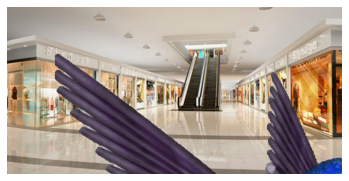

In [0]:
overlay('/content/gdrive/My Drive/eva_files/rcnn/bg/2.jpg','/content/gdrive/My Drive/eva_files/rcnn/p1-1.png')

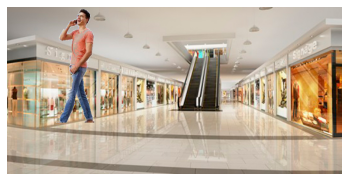

In [0]:
overlay('/content/gdrive/My Drive/eva_files/rcnn/bg/.jpg','/content/gdrive/My Drive/eva_files/rcnn/people-no bg/2.jpg')

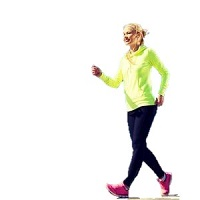

In [0]:
IMAGE(filename='/content/gdrive/My Drive/eva_files/rcnn/people-no bg/5.jpg')

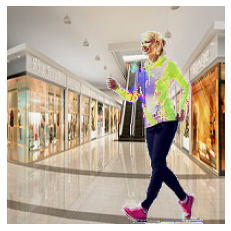

In [0]:
overlay('/content/gdrive/My Drive/eva_files/rcnn/bg-resized/2.jpg','/content/gdrive/My Drive/eva_files/rcnn/people-no bg/5.jpg')

Method 2: Tried to find borders of the foreground object by finding a pixel value == white, this finally gives an outline of the object in image. Then replaced pixel values of background image with foreground image.

Limitation: border may not form properly.

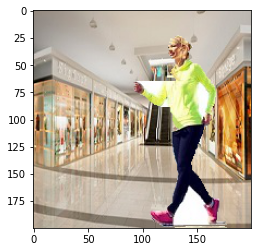

In [0]:
bground = Image.open('/content/gdrive/My Drive/eva_files/rcnn/bg-resized/2.jpg')   # reads an image in the BGR format
bground1 = np.array(bground)
person1 = Image.open('/content/gdrive/My Drive/eva_files/rcnn/people-no bg/5.jpg')   # reads an image in the BGR format
person = np.array(person1)

x=0
y=0
bg1 = True
bg2 = True
a1=0
b1=0
c1=0

a2=0
b2=0
c2=0
for i in range(person.shape[0]):
  bg1 = True
  bg2 = True
  a1=0
  b1=0
  c1=0

  a2=0
  b2=0
  for j in range(person.shape[1]):
    for k in range(3):
      if person[i][j][k] <= 200 and bg1!=False: # check if pixel value is not white
        bg1 = False
        b1=j
        c1=k
      if person[i][-j][k] <=200 and bg2!=False:
        bg2 = False
        b2=200-j
        c2=k
      if bg1 == False and bg2 ==False:
        bground1[i][b1:b2][c1:] = person[i][b1:b2][c1:]
        break
 

plt.imshow(bground1)
# plt.axis('off')
plt.savefig('test1.png')

In [0]:
Image.open('/content/p1-1.png').format

'PNG'

Finally used the paste method of PIL library.

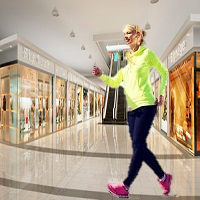

In [0]:
bg = Image.open('/content/gdrive/My Drive/eva_files/rcnn/bg-resized/2.jpg')
fg = Image.open('/content/gdrive/My Drive/eva_files/rcnn/p2.png')

bg.paste(fg,(0,0),fg)
bg